In [1]:
from skimage import io
import numpy as np

Duplicate key in file '/Users/parijatparimal/.matplotlib/matplotlibrc' line #2.


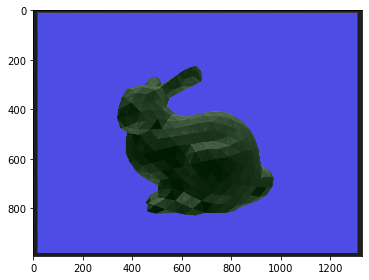

In [2]:
img = io.imread('bunny.png')
bunnyInt = np.array(img)
bunny = bunnyInt.astype(float)
bunny /= 255
io.imshow(bunny)
img = io.imread('cube.png')
cubeInt = np.array(img)
cube = cubeInt.astype(float)
cube /= 255

In [3]:
print(bunny.shape)
print(cube.shape)

(992, 1328, 4)
(992, 1328, 4)


In [4]:
print(type(bunny[0][0][0]))
print(type(cube[0][0][0]))


<class 'numpy.float64'>
<class 'numpy.float64'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(992, 1328, 3)


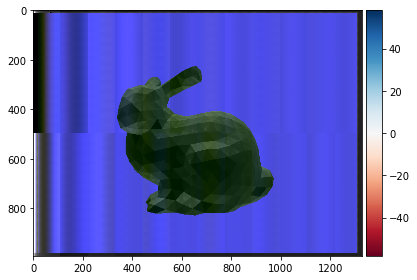

In [13]:
from scipy.fftpack import dct, idct

bx1 = bunny[:,:,0]
bx2 = bunny[:,:,1]
bx3 = bunny[:,:,2]

#img = Image.fromarray(bx1*255)
#img.show()

bx11 = dct(bx1, norm='ortho')
bx22 = dct(bx2, norm='ortho')
bx33 = dct(bx3, norm='ortho')


g = 2
watermark1 = g * cube[:,:,0]
watermark2 = g * cube[:,:,1]
watermark3 = g * cube[:,:,2]

bx11 += watermark1
bx22 += watermark2
bx33 += watermark3


bx111 = idct(bx11, norm='ortho')
bx222 = idct(bx22, norm='ortho')
bx333 = idct(bx33, norm='ortho')

#img = Image.fromarray(bx111*255)
#img.show()

final_rgb = np.stack([bx111, bx222, bx333], axis=2)
print(final_rgb.shape)
io.imshow(final_rgb)